# Data Science Project On FIFA Analysis

## A little background

Assume that there's a formula to calculate the "Overall" ratings for soccer players by EA Sports (The developer of FIFA 2019). With this formula, we can easily calculate the overall ratings for any player even he/she is not in the game. The problem is, we don't know what exactly the formula looks like.

We know the *input* which consists of player attributes and the *output* which is the Overall ratings. Then we can use an approach called "regression" to "estimate" the formula based on the input/output.

Today, we are going to use a simple model called Linear Regression. Let assume the formula that calculates the overall ratings of soccer player $ y = f(x)$ is \[ f(x) = ax + b \]. The linear regression aims to figure out $a$ and $b$. The formula $f(x)$ is called "model" in machine learning, and the process of solve/estimate the model is called "training" the model. Once we trained the model, we can use it to predict target $y$ of new data.

## Step 1 : Load Dataset

About Dataset:

FIFA 2019 is a video soccer game. All the players in this game have an overall rating as well as a lot of attributes such as crossing, finishing, etc.

This dataset contains 18207*89 instances and features of FIFA 2019. The main aim of this project is to predict the overall performance of the FIFA 2019.

Dataset Link: https://www.kaggle.com/karangadiya/fifa19/


## Step 2 : start the project
### Lets start by importing libraries

In [1]:
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For Linear Regression Prediction 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

## Step 3: load dataset

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.shape

(18207, 89)

In [4]:
data.size

1620423

#### To check the first 5 rows and columns

In [5]:
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


#### To check the last 5 rows and columns

In [6]:
data.tail()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K
18206,18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K


#### Data types

In [7]:
data.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

#### Let’s Eye on Indian Footballers

In [8]:
def country(x):
    return data[data['Nationality'] == x][['Name','Overall','Potential','Position']]
country('India')

,Name,Overall,Potential,Position
8605,S. Chhetri,67,67,LS
10011,S. Jhingan,65,71,RCB
12598,J. Lalpekhlua,63,64,RS
12811,G. Singh Sandhu,63,68,GK
13508,A. Edathodika,62,62,LCB
14054,P. Halder,61,67,RCM
14199,P. Kotal,61,66,RB
14218,L. Ralte,61,62,LW
14705,N. Das,60,65,LB
14786,U. Singh,60,67,RM


In [9]:
country('India').shape

(30, 4)

#### Analyzing Club Data( Manchester United)

In [10]:
def club(x):
    return data[data['Club'] == x][['Name','Jersey Number','Position',
                                    'Overall','Nationality','Age','Wage',
                                    'Value','Contract Valid Until']]

club('Manchester United')

,Name,Jersey Number,Position,Overall,Nationality,Age,Wage,Value,Contract Valid Until
3,De Gea,1.0,GK,91,Spain,27,€260K,€72M,2020
45,P. Pogba,6.0,RDM,87,France,25,€210K,€64M,2021
47,R. Lukaku,9.0,ST,87,Belgium,25,€230K,€62.5M,2022
93,A. Sánchez,7.0,RW,85,Chile,29,€215K,€37.5M,2022
116,A. Martial,11.0,LW,84,France,22,€165K,€42.5M,2019
132,N. Matić,31.0,CDM,84,Serbia,29,€165K,€24M,2020
211,Juan Mata,8.0,RM,83,Spain,30,€160K,€24.5M,2019
250,Fred,17.0,CM,82,Brazil,25,€140K,€26.5M,2023
254,J. Lingard,7.0,CAM,82,England,25,€140K,€26.5M,2021
319,M. Rashford,11.0,LW,81,England,20,€110K,€27M,2020


In [11]:
club('Manchester United').shape

(33, 9)

## Step 4 : Handling the Missing values of Data

In [12]:
data.isnull()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

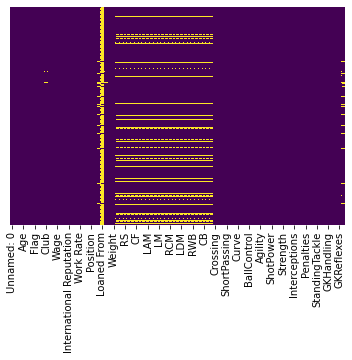

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [15]:
##Missing data percentage list
for col in data.columns:
  pct_missing=np.mean(data[col].isnull())
  print('{}-{}%'.format(col,round(pct_missing*100)))

Unnamed: 0-0%
ID-0%
Name-0%
Age-0%
Photo-0%
Nationality-0%
Flag-0%
Overall-0%
Potential-0%
Club-1%
Club Logo-0%
Value-0%
Wage-0%
Special-0%
Preferred Foot-0%
International Reputation-0%
Weak Foot-0%
Skill Moves-0%
Work Rate-0%
Body Type-0%
Real Face-0%
Position-0%
Jersey Number-0%
Joined-9%
Loaned From-93%
Contract Valid Until-2%
Height-0%
Weight-0%
LS-11%
ST-11%
RS-11%
LW-11%
LF-11%
CF-11%
RF-11%
RW-11%
LAM-11%
CAM-11%
RAM-11%
LM-11%
LCM-11%
CM-11%
RCM-11%
RM-11%
LWB-11%
LDM-11%
CDM-11%
RDM-11%
RWB-11%
LB-11%
LCB-11%
CB-11%
RCB-11%
RB-11%
Crossing-0%
Finishing-0%
HeadingAccuracy-0%
ShortPassing-0%
Volleys-0%
Dribbling-0%
Curve-0%
FKAccuracy-0%
LongPassing-0%
BallControl-0%
Acceleration-0%
SprintSpeed-0%
Agility-0%
Reactions-0%
Balance-0%
ShotPower-0%
Jumping-0%
Stamina-0%
Strength-0%
LongShots-0%
Aggression-0%
Interceptions-0%
Positioning-0%
Vision-0%
Penalties-0%
Composure-0%
Marking-0%
StandingTackle-0%
SlidingTackle-0%
GKDiving-0%
GKHandling-0%
GKKicking-0%
GKPositioning-0%
GKRefle

### Describing the data
we use a function called describe() to print its statistics.

In [16]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


#### Filling the missing value for the proper data visualization

In [17]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True)
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)
data['Curve'].fillna(data['Curve'].mean(), inplace = True)
data['FKAccuracy'].fillna(data['FKAccuracy'], inplace = True)
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)
data['Weight'].fillna('200lbs', inplace = True)
data['Contract Valid Until'].fillna(2019, inplace = True)
data['Height'].fillna("5'11", inplace = True)
data['Loaned From'].fillna('None', inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(8, inplace = True)
data['Body Type'].fillna('Normal', inplace = True)
data['Position'].fillna('ST', inplace = True)
data['Club'].fillna('No Club', inplace = True)
data['Work Rate'].fillna('Medium/ Medium', inplace = True)
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)
data['Weak Foot'].fillna(3, inplace = True)
data['Preferred Foot'].fillna('Right', inplace = True)
data['International Reputation'].fillna(1, inplace = True)
data['Wage'].fillna('€200K', inplace = True)
data.fillna(0, inplace = True)

In [18]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina',  'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 'ShotPower','LongShots', 'Penalties']].mean()).mean()))

#### Filling the missing value for the continuous variables for proper data visualization!

In [19]:
data.isnull()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
data.isnull().sum()

Unnamed: 0        0
ID                0
Name              0
Age               0
Photo             0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 89, dtype: int64

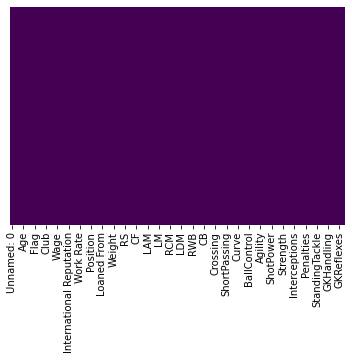

In [21]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [22]:
##Missing data percentage list
for col in data.columns:
  pct_missing=np.mean(data[col].isnull())
  print('{}-{}%'.format(col,round(pct_missing*100)))

Unnamed: 0-0%
ID-0%
Name-0%
Age-0%
Photo-0%
Nationality-0%
Flag-0%
Overall-0%
Potential-0%
Club-0%
Club Logo-0%
Value-0%
Wage-0%
Special-0%
Preferred Foot-0%
International Reputation-0%
Weak Foot-0%
Skill Moves-0%
Work Rate-0%
Body Type-0%
Real Face-0%
Position-0%
Jersey Number-0%
Joined-0%
Loaned From-0%
Contract Valid Until-0%
Height-0%
Weight-0%
LS-0%
ST-0%
RS-0%
LW-0%
LF-0%
CF-0%
RF-0%
RW-0%
LAM-0%
CAM-0%
RAM-0%
LM-0%
LCM-0%
CM-0%
RCM-0%
RM-0%
LWB-0%
LDM-0%
CDM-0%
RDM-0%
RWB-0%
LB-0%
LCB-0%
CB-0%
RCB-0%
RB-0%
Crossing-0%
Finishing-0%
HeadingAccuracy-0%
ShortPassing-0%
Volleys-0%
Dribbling-0%
Curve-0%
FKAccuracy-0%
LongPassing-0%
BallControl-0%
Acceleration-0%
SprintSpeed-0%
Agility-0%
Reactions-0%
Balance-0%
ShotPower-0%
Jumping-0%
Stamina-0%
Strength-0%
LongShots-0%
Aggression-0%
Interceptions-0%
Positioning-0%
Vision-0%
Penalties-0%
Composure-0%
Marking-0%
StandingTackle-0%
SlidingTackle-0%
GKDiving-0%
GKHandling-0%
GKKicking-0%
GKPositioning-0%
GKReflexes-0%
Release Clause-0%


## Data Visualization

### Comparison of preferred foot over the different players!

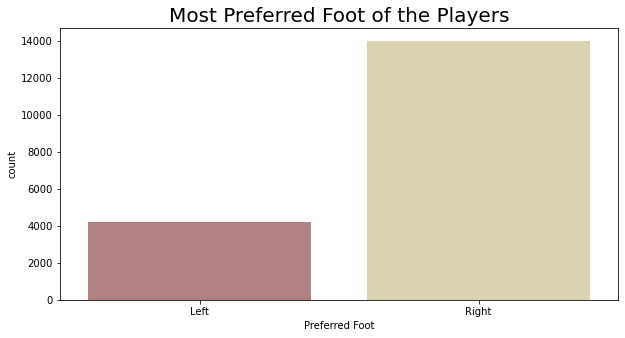

In [24]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot((data['Preferred Foot']), palette = 'pink')
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

### Different positions acquired by the players

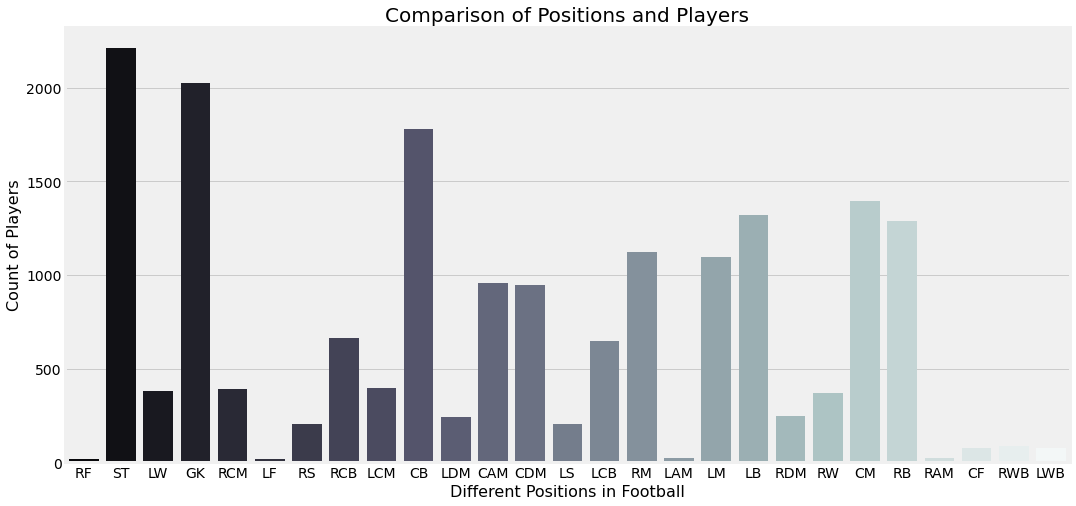

In [25]:
plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot('Position', data = data, palette = 'bone')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

### Height of Players

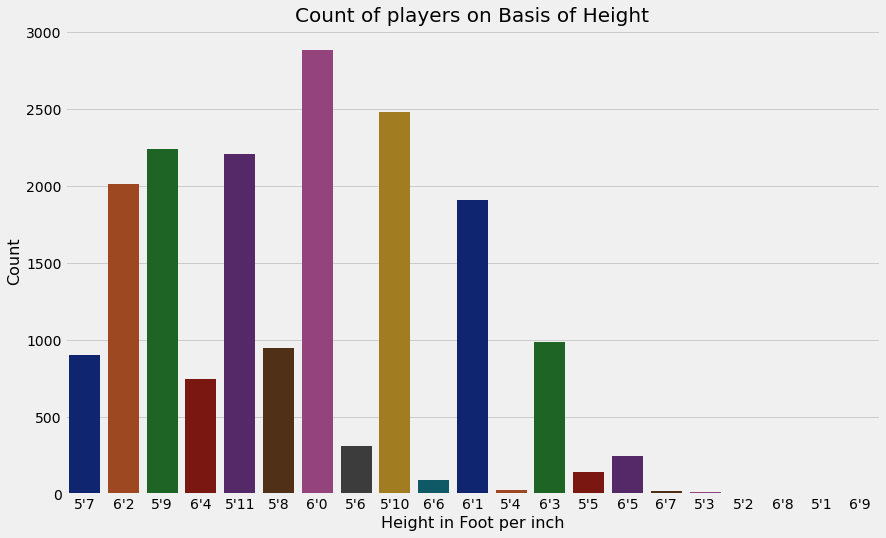

In [26]:
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

### To show Different Work rate of the players participating in the FIFA

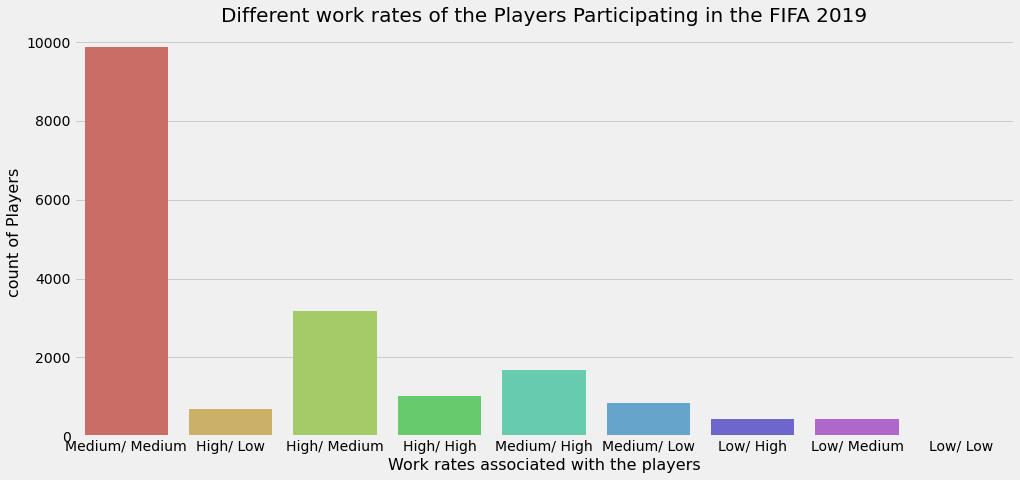

In [27]:
plt.figure(figsize = (15, 7))
sns.countplot(x = 'Work Rate', data = data, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

### To show Different Speciality Score of the players participating in the FIFA

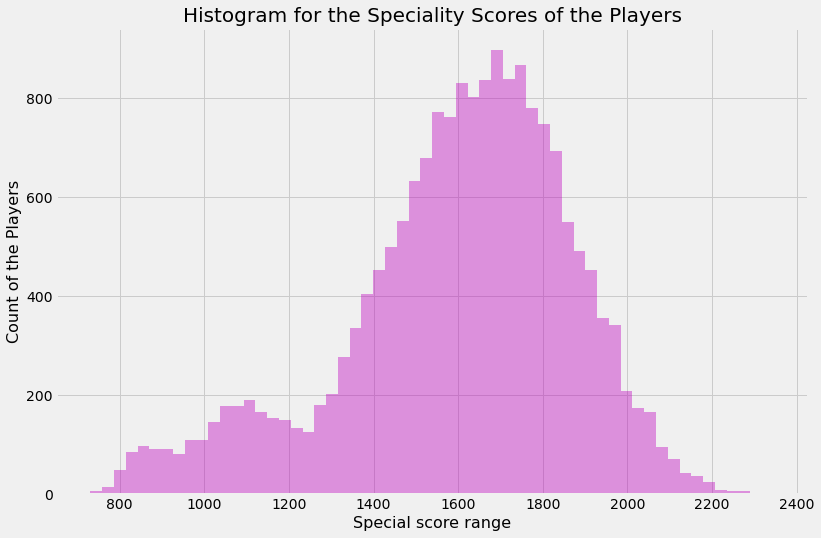

In [28]:
x = data.Special
plt.figure(figsize = (12, 8))
plt.style.use('tableau-colorblind10')

ax = sns.distplot(x, bins = 58, kde = False, color = 'm')
ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
plt.show()

### To show Different potential scores of the players participating in the FIFA 2019

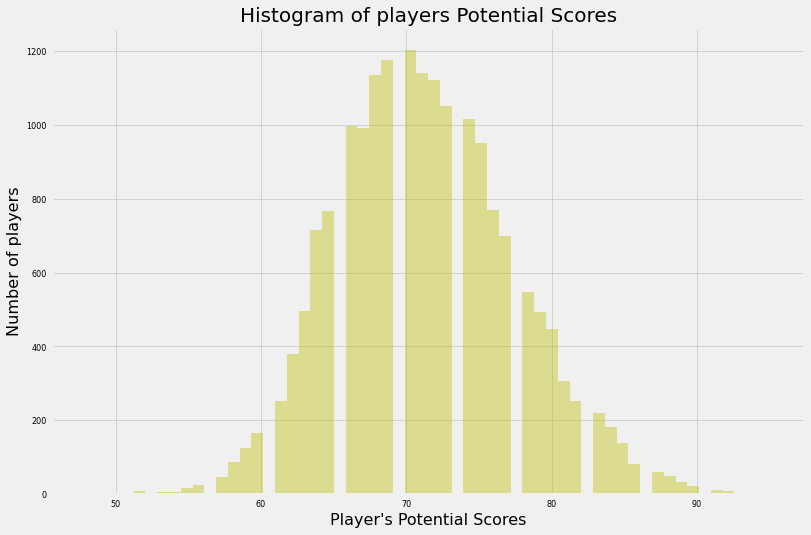

In [29]:
x = data.Potential
plt.figure(figsize=(12,8))
plt.style.use('seaborn-paper')

ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player\'s Potential Scores", fontsize = 16)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 16)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 20)
plt.show()

### To show Different Positions in the FIFA 2019

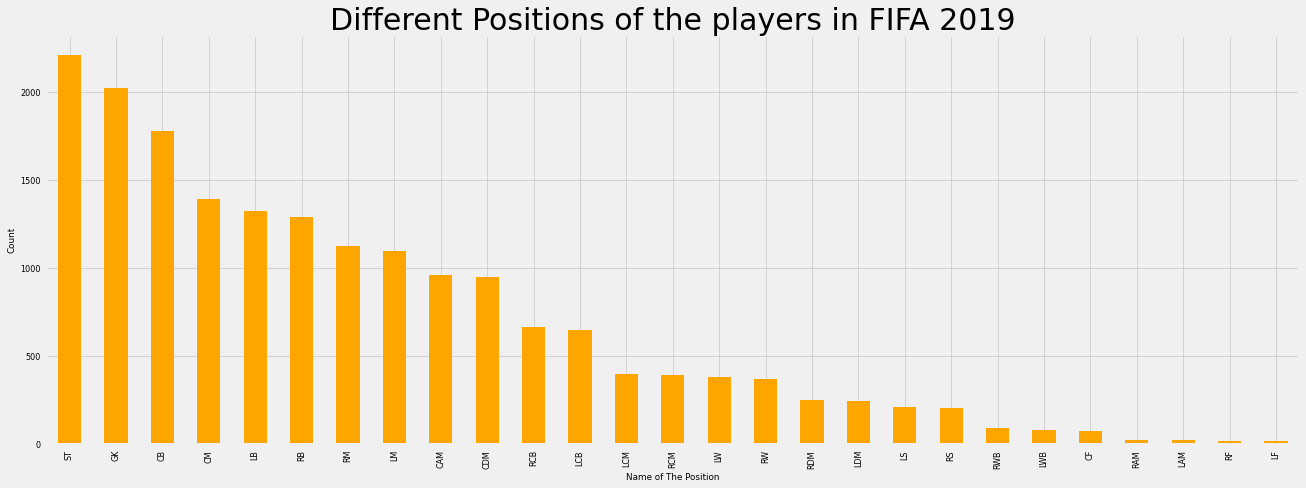

In [30]:
data['Position'].value_counts().head(80).plot.bar(color = 'orange', figsize = (20, 7))
plt.title('Different Positions of the players in FIFA 2019', fontsize = 30, fontweight = 20)
plt.xlabel('Name of The Position')
plt.ylabel('Count')
plt.show()

### Countries with Most Players

In [31]:
data['Nationality'].value_counts().head(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

### Finding the the popular clubs around the globe

In [32]:
data['Club'].value_counts().head(10)

No Club                    241
Chelsea                     33
FC Barcelona                33
AS Monaco                   33
Valencia CF                 33
Wolverhampton Wanderers     33
Arsenal                     33
Tottenham Hotspur           33
Empoli                      33
Cardiff City                33
Name: Club, dtype: int64

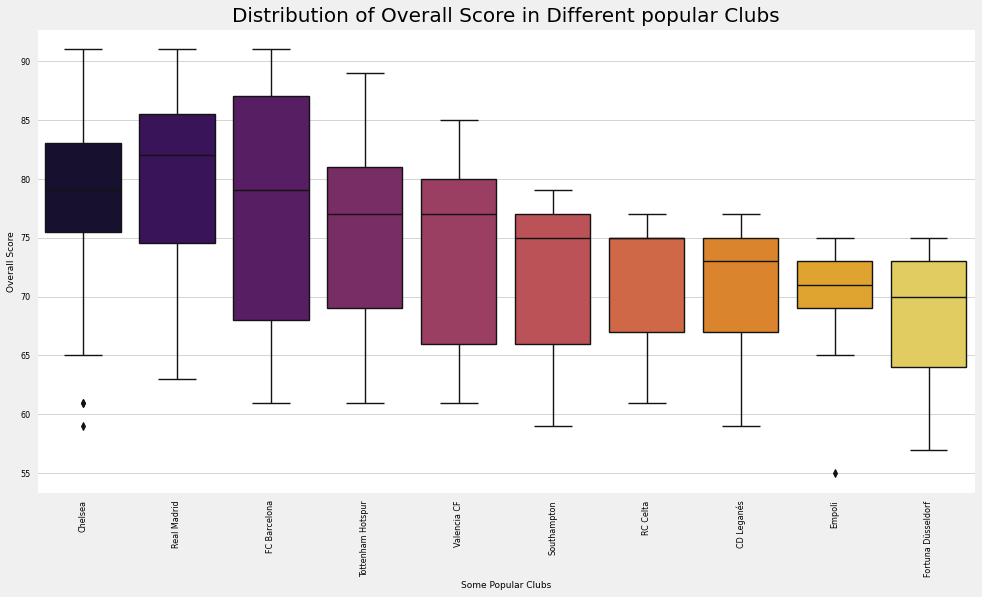

In [33]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_facecolor('white')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

### Comparing the performance of left-footed and right-footed footballers

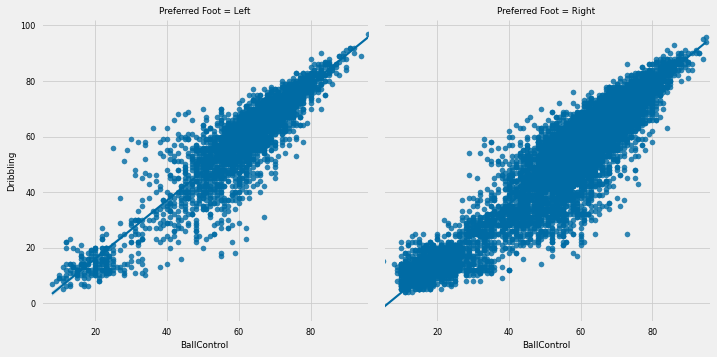

In [34]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

## Step 4: Pre-process data
In real life, each soccer player has a specific position. Different positions require strength in different attributes. So let’s narrow down the scope to the striker.

First, let’s list all the positions. This statement looks a little bit longer, but it does the work. The fifa_data['position'] selects position column of the fifa_data, the dropna() eliminates cells that are blank, and unique() remove all duplicated items for us.

In [35]:
print(data['Position'].dropna().unique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']


In [36]:
# get players by position
data_by_pos = data[data['Position']=='ST']

Next, I want to split the data into two sets, one is used to train the model, another one is used to verify the trained model is good. I leave 25% of the data for testing.

In [37]:
train_data, test_data = train_test_split(data_by_pos,test_size=0.25)
print("The # of training data is " + str(len(train_data)))
print("The # of testing data is " + str(len(test_data)))

The # of training data is 1659
The # of testing data is 553


## Step 5: feature selection

Next step is selecting proper features. Feature selection is a term in machine learning to describe the method and process of choosing relevant features for the model. A feature is one $x$ in the formula. In our story, it is an attribute of a soccer player.

Since here, I'm using the linear regression model, how attribute correlated to the target (“Overall”) becomes the criteria to choose the right features.

Here, I use a built-in function correlation 'corr' to Compute pairwise correlation of columns. There are three methods we can choose from,

pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman : Spearman rank correlation

In this project I'm going to use pearson method to find correlation.

In [38]:
# select target
target = "Overall"

# To find the correlation among the columns using pearson method 
feature_corr = train_data.corr(method ='pearson') [target]

# sort the features
feature_corr = feature_corr.sort_values(ascending = False)

# show the top 20 features
# note that we are start from 1 not zero, because Overall is alwasy on the top of the list
print(feature_corr[1:21])

Special            0.899612
BallControl        0.898146
Finishing          0.846820
Volleys            0.824776
ShortPassing       0.812117
Dribbling          0.795772
HeadingAccuracy    0.715925
Composure          0.669259
Positioning        0.668461
Curve              0.653928
Skill Moves        0.653740
Reactions          0.645329
ShotPower          0.640586
Crossing           0.605609
LongShots          0.600826
Potential          0.588877
LongPassing        0.564453
Vision             0.554453
FKAccuracy         0.549331
Age                0.537747
Name: Overall, dtype: float64


In [39]:
# extract feature names from the series
features = feature_corr[1:21].index.tolist()
print(features)

['Special', 'BallControl', 'Finishing', 'Volleys', 'ShortPassing', 'Dribbling', 'HeadingAccuracy', 'Composure', 'Positioning', 'Curve', 'Skill Moves', 'Reactions', 'ShotPower', 'Crossing', 'LongShots', 'Potential', 'LongPassing', 'Vision', 'FKAccuracy', 'Age']


## Step 6 : Train the model
Now, I'm ready to train the model. we use "LinearRegression().fit()" to train it.
This model object has a score() function to return the score of the model.

In [40]:
# prepare training data
x_train = train_data[features]
y_train = train_data[target]

# Applying Linear regression
# fit() is the method to train the model
model = LinearRegression().fit(x_train,y_train)

# Model's score
print("Score: " + str(model.score(x_train,y_train)))

Score: 0.969252121098977


## Step 7: Try the model on testing data

Now, I am going to using the trained model to estimate players in test_data. Similar to what we do to the train_data, we create x_test and y_test.

model.predict() will generate a list of predicted results.

In [41]:
# we would like to sort test data on target value ("Overall")
test_data = test_data.sort_values([target], ascending=False)

x_test = test_data[features]
y_test = test_data[target]

y_pred = model.predict(x_test)

In [42]:
# add a new column of predicted overall to test_data
test_data['Predicted Overall'] = y_pred.copy()

# add a new column of prediction difference ratio to test_data
difference = (y_pred - y_test) / y_test * 100
test_data['Difference (%)'] = difference

# print the results
test_data[["Name", "Nationality", "Club", "Overall", "Predicted Overall", "Difference (%)"]]

,Name,Nationality,Club,Overall,Predicted Overall,Difference (%)
1,Cristiano Ronaldo,Portugal,Juventus,94,92.293488,-1.815438
47,R. Lukaku,Belgium,Manchester United,87,82.505844,-5.165696
139,M. Mandžukić,Croatia,Juventus,84,85.527998,1.819045
179,S. Gnabry,Germany,FC Bayern München,83,78.659695,-5.229283
156,Gabriel Jesus,Brazil,Manchester City,83,82.924520,-0.090940
...,...,...,...,...,...,...
17978,M. Bloomfield,England,Hamilton Academical FC,51,49.794829,-2.363081
18084,Kwon Ki Pyo,Korea Republic,Pohang Steelers,50,50.936649,1.873297
18062,Gao Dalun,China PR,Jiangsu Suning FC,50,49.837364,-0.325273
18130,F. Sinclair-Smith,England,Blackpool,49,50.672925,3.414132


With the result, you’re confident to use this model to estimate the overall ratings of any soccer player in the world!

Now let’s do some plotting to visualize it.

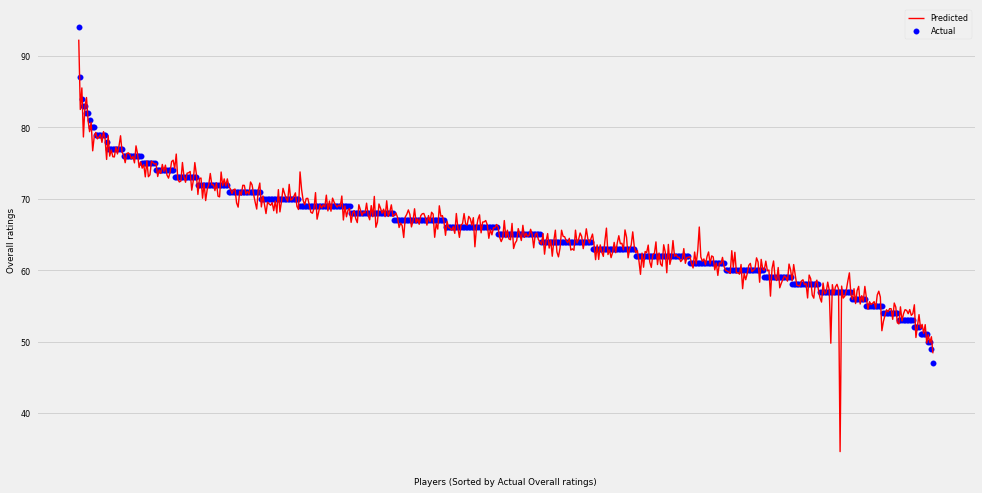

In [43]:
# Plot outputs
plt.scatter(range(0,y_test.shape[0]), y_test,  color='blue', label="Actual")
plt.plot(range(0,y_test.shape[0]), y_pred, color='red', label="Predicted")

# add ticks, labels, legend
plt.xticks(())
plt.xlabel("Players (Sorted by Actual Overall ratings)")
plt.ylabel("Overall ratings")
plt.legend(loc='upper right')
plt.show()